<a href="https://colab.research.google.com/github/Kasidit-Beem/Kasidit-Beem/blob/main/Higgs_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi.

This is a neural network tutorial designed to make sure you know how to create and evaluate your neural network. In this tutorial, we will be using a HIGGS dataset involving theoretical heavy Higgs bosons via Monte-Carlo simulated collision events. Everything you are seeing in this tutorial does not involve any real data taking at CERN or anywhere else, so rest assured. We are not looking for new particles at the LHC. Not yet, at least.

This tutorial will be based on the HIGGS dataset available here: https://archive.ics.uci.edu/ml/datasets/HIGGS#, which is used in the following work:
P. Baldi, P. Sadowski, and D. Whiteson, Nat. Commun. 5 (2014) 4308

If you get stuck, you know how to reach me. Have fun!

Let's import some libraries first. I am importing Keras layers directly, but if you come from this tutorial on TensorFlow website https://www.tensorflow.org/tutorials/keras/classification, I have already imported the necessary libraries for you too.

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt

Now download and unzip the HIGGS dataset. This dataset is generated with Monte-Carlo simulations, and it contains signal processes which generates Higgs, and background processes which does not.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
!gunzip HIGGS.csv.gz

--2021-09-14 13:00:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  34.8MB/s    in 71s     

2021-09-14 13:01:42 (38.0 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



This is a large dataset of 11 million events, so it will take time.

An exclamation mark `!` in front of the commands are shell commands that you can execute directly in Jupyter notebook. This example below shows what kind of files we have right now in the working directory. If you want to understand this further you need to know your way around bash shell, `wget`, and `gunzip`.

In [ ]:
!ls -l

total 7847176
-rw-r--r-- 1 root root 8035497980 Feb 14  2014 HIGGS.csv
drwxr-xr-x 1 root root       4096 Sep  1 19:26 sample_data


Peeking into the `head` of the extracted CSV file...

In [ ]:
!head HIGGS.csv

1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
1.000000000000000000e+00,9.075421094894409180e-01,3.291472792625427246e-01,3.594118654727935791e-01,1.497969865798950195e+00,-3.130095303058624268e-01,1.095530629158020020e+00,-5.575249195098876953e-01,-1.588229775428771973e+00,2.173076152801513672e+00,8.12581181526

Now we import data with pandas using the following command. I have written a quick code which will import the above CSV file into a nice pandas DataFrame format, so you don't have to do any kind of wetwork. 

Again, we are using a dataset of 11 million events, so it will take some time.

In [ ]:
column_headers = ["signal", 'lepton_pT',
 'lepton_eta',
 'lepton_phi',
 'MET',
 'MET_phi',
 'jet1_pt','jet1_eta','jet1_phi','jet1_btag',
 'jet2_pt','jet2_eta','jet2_phi','jet2_btag',
 'jet3_pt','jet3_eta','jet3_phi','jet3_btag',
 'jet4_pt','jet4_eta','jet4_phi','jet4_btag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']
higgs_data = pd.read_csv("HIGGS.csv", names=column_headers)

Since pandas is a library that handles tabular data, you can have it output the table nicely like this.

In [ ]:
higgs_data

,signal,lepton_pT,lepton_eta,lepton_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,-0.653674,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,1.858587,1.131711,-0.561694,0.000000,0.961000,0.671026,-0.178822,0.000000,1.177604,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
10999996,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,1.002570,-0.636189,-0.367500,0.000000,0.650326,0.511733,-0.182705,0.000000,1.427826,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
10999997,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,1.345027,0.993776,-1.298508,2.214872,1.252707,1.465673,1.262483,0.000000,0.419634,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
10999998,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,0.733136,0.356554,0.354436,2.214872,0.618363,-0.092672,-0.997614,0.000000,0.845596,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


The table above contains 11 million collision events generated from Monte-Carlo simulations. The first column tells us whether the event is a signal event (1) where a Higgs boson is generated, or a background event (0) where a Higgs boson is not generatedd. The next 21 columns are low-level variables: transverse momentum (pT), pseudorapidity (eta), polar angle in the transverse plane (phi), and b-tagging discriminators from several objects (leptons, particle jets, and neutrinos) in each event. The last 7 columns represent the invariant mass of each combination of objects, like two jets, three jets, one lepton plus one neutrino, and so on. Unfortunately, the data has been already normalised, so you didn't get to see what the distribution of jet pT actually looks like.

The Higgs process that we are looking at is the process involving "new theoretical Higgs bosons", which subsequently decays into two W bosons and two b quarks. The background process, on the other hand, is a simple top-antitop quark pair production, which eventually decays into two W bosons and two b quarks, the same as in signal process. The idea is that we want to discriminate between those two processes by means of machine learning.

Now here are some physics details. What you will be seeing right after each collision is the final state of particles, not the particles created right after proton-proton collision. Normally you will see some photons, leptons, particle jets, and sometimes there are some things missing. Those stuffs are the final state particles, and it can be caused by a chain of particle decays, initial or final state radiations, or it may be caused by another interaction occuring at the same time as the main collision (which we call pileup). Right after quarks are created, they cannot be free and must group up with other quarks and form hadrons, so you would not see quarks individually, but a stream of particle jets, or put simply, jets. As for neutrinos, usually detectors like CMS and ATLAS detectors cannot detect them, but you need to have net zero transverse momentum since you have a head-on collision. This is where missing transverse energy (MET) comes in.

If you are interested about this dataset, have a look at this paper: 
P. Baldi, P. Sadowski, and D. Whiteson, Nat. Commun. 5 (2014) 4308

Now we are going to define the training and testing datasets. We want to do this quickly, so I will be using only 100k events each for training and testing datasets.

In [27]:
higgs_data_train = higgs_data[:100000]
higgs_data_test = higgs_data[100000:200000]

In [ ]:
higgs_data_train

,signal,lepton_pT,lepton_eta,lepton_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,-0.653674,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.541120,-0.948700,-0.762068,0.752259,-0.835360,0.554040,-0.258475,0.639910,1.086538,0.976885,-0.262211,-1.609767,2.214872,0.854398,0.484425,0.449796,0.000000,0.754319,0.111138,0.049226,0.000000,0.359801,0.921513,0.977563,1.157282,0.971256,0.962689,0.914845
99996,1.0,0.957321,-0.759750,1.210569,0.863929,-0.120751,0.505580,0.058398,-0.496662,1.086538,0.509909,-1.065537,-0.819135,0.000000,0.892683,0.488976,0.995101,2.548224,0.534765,1.127182,1.674563,0.000000,0.838526,0.731589,1.173853,0.848387,0.840251,0.702825,0.642653
99997,1.0,0.878993,-1.687942,-1.318039,0.407732,-1.481964,0.847367,-0.680313,1.462603,1.086538,0.594642,-1.585221,0.128620,0.000000,1.115722,1.191688,0.286149,0.000000,1.044703,-1.756052,-0.869814,0.000000,0.841216,1.112265,1.003257,0.768167,0.911731,0.911673,0.805071
99998,0.0,1.090185,0.409987,1.036898,0.427749,-1.035207,1.191169,-0.537720,1.576804,2.173076,1.156927,-1.141304,-0.085648,0.000000,0.892508,-1.306944,-0.826201,0.000000,1.113588,0.301854,-0.435315,3.101961,0.986065,0.995841,0.989216,0.851650,1.313143,1.096304,0.963150


Don't worry about class imbalance in training dataset for now. Our training and testing datasets have a good balance. Trust me, I have seen worse signal-background distribution than this.

In [28]:
higgs_data_train["signal"].value_counts()

1.0    52834
0.0    47166
Name: signal, dtype: int64

In [29]:
higgs_data_test["signal"].value_counts()

1.0    52842
0.0    47158
Name: signal, dtype: int64

Separating the data into features and labels one more time. The training and testing data is now in the form of a lovely numpy array, which you can plug in easily, just like in the tutorial.

In [31]:
x_train, y_train = higgs_data_train.to_numpy()[:, 1:], higgs_data_train.to_numpy()[:, 0]
x_test, y_test = higgs_data_test.to_numpy()[:, 1:], higgs_data_test.to_numpy()[:, 0]

In [10]:
x_train.shape, x_test.shape

((100000, 28), (100000, 28))

**Time to get to work.** 

Your job is to design a neural network that takes in the input above and train them. Consult the tutorial if you get stuck. https://www.tensorflow.org/tutorials/keras/classification

If you are still stuck or you have any technical problems, you know how to reach me.

In [69]:
# Y88b   d88P  .d88888b.  888     888 8888888b.        .d8888b.   .d88888b.  8888888b.  8888888888      888    888 8888888888 8888888b.  8888888888 
#  Y88b d88P  d88P" "Y88b 888     888 888   Y88b      d88P  Y88b d88P" "Y88b 888  "Y88b 888             888    888 888        888   Y88b 888        
#   Y88o88P   888     888 888     888 888    888      888    888 888     888 888    888 888             888    888 888        888    888 888        
#    Y888P    888     888 888     888 888   d88P      888        888     888 888    888 8888888         8888888888 8888888    888   d88P 8888888    
#     888     888     888 888     888 8888888P"       888        888     888 888    888 888             888    888 888        8888888P"  888        
#     888     888     888 888     888 888 T88b        888    888 888     888 888    888 888             888    888 888        888 T88b   888        
#     888     Y88b. .d88P Y88b. .d88P 888  T88b       Y88b  d88P Y88b. .d88P 888  .d88P 888             888    888 888        888  T88b  888        
#     888      "Y88888P"   "Y88888P"  888   T88b       "Y8888P"   "Y88888P"  8888888P"  8888888888      888    888 8888888888 888   T88b 8888888888 

model=tf.keras.Sequential([tf.keras.layers.Dense(128, activation='sigmoid'),tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy","AUC"])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))



Epoch 1/20
3125/3125 [==============================] - 8s 2ms/step - loss: 0.6590 - accuracy: 0.6014 - auc: 0.6375 - val_loss: 0.6489 - val_accuracy: 0.6130 - val_auc: 0.6637
Epoch 2/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6461 - accuracy: 0.6216 - auc: 0.6634 - val_loss: 0.6447 - val_accuracy: 0.6257 - val_auc: 0.6751
Epoch 3/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6393 - accuracy: 0.6324 - auc: 0.6773 - val_loss: 0.6360 - val_accuracy: 0.6360 - val_auc: 0.6894
Epoch 4/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6331 - accuracy: 0.6406 - auc: 0.6891 - val_loss: 0.6339 - val_accuracy: 0.6394 - val_auc: 0.6986
Epoch 5/20
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6284 - accuracy: 0.6477 - auc: 0.6978 - val_loss: 0.6321 - val_accuracy: 0.6419 - val_auc: 0.7008
Epoch 6/20
3125/3125 [==============================] - 10s 3ms/step - loss: 0.6238 - accuracy: 0.6538 - auc: 0.7058 - v

In [70]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (32, 128)                 3712      
_________________________________________________________________
dense_49 (Dense)             (32, 1)                   129       
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [56]:
# LOOK HERE.
# The fit() method allows you to calculate validation metrics with validation_data option.
# Its output can also be saved as a value too. Make sure you have your fit look like this.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
3125/3125 [==============================] - 7s 2ms/step - loss: 8.1497 - accuracy: 0.4717 - val_loss: 8.1509 - val_accuracy: 0.4716
Epoch 2/20
3125/3125 [==============================] - 6s 2ms/step - loss: 8.1496 - accuracy: 0.4717 - val_loss: 8.1509 - val_accuracy: 0.4716
Epoch 3/20
3125/3125 [==============================] - 6s 2ms/step - loss: 8.1496 - accuracy: 0.4717 - val_loss: 8.1509 - val_accuracy: 0.4716
Epoch 4/20
3125/3125 [==============================] - 6s 2ms/step - loss: 8.1496 - accuracy: 0.4717 - val_loss: 8.1509 - val_accuracy: 0.4716
Epoch 5/20
 125/3125 [>.............................] - ETA: 3s - loss: 8.2061 - accuracy: 0.4680

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f619a05e560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


3125/3125 [==============================] - 6s 2ms/step - loss: 8.1496 - accuracy: 0.4717 - val_loss: 8.1509 - val_accuracy: 0.4716
Epoch 6/20
3125/3125 [==============================] - 6s 2ms/step - loss: 8.1496 - accuracy: 0.4717 - val_loss: 8.1509 - val_accuracy: 0.4716
Epoch 7/20
1702/3125 [===============>..............] - ETA: 1s - loss: 8.1396 - accuracy: 0.4723

KeyboardInterrupt: ignored

As I am writing this notebook I just got vaccinated. My brain and my fingers are now a bit slow and inaccurate. Still I got the accuracy on the training set at around 71%, and test set around 70%. 

What's more interesting, however, is the AUC, or Area Under Curve. The "Curve" we are talking about is the Receiver Operating Characteristic Curve. I don't want to spend some time to explain this, since it is 1 AM now, but essentially ROC curve is the curve that shows how much true positive (_signal entries determined by the discriminator as signal_) is going to be if we adjust the discriminator cut to have certain levels of false positive (_background entries determined by the discriminator as signal_). If AUC approaches to 1, it means our discriminator (or in this case the neural network) is perfect and can allow very small false positives. If AUC is 0.5, our discriminator is no better than random guessing.

The point is AUC can be used as a metric, or a number to check how well the network performs. We can use accuracy here, but if our network can provide predictions as a number between 0 and 1, the accuracy will change if we change the cut. AUC, on the other hand, can be invariant of the discriminator cut.

The code below will draw the evolution of loss and AUC during the training of several epochs, depending on how long you have specified your training. If the training is good, the metrics between training and validation datasets should be close. If the validation metrics are worse than training metrics, this means we have overtraining issues, and that is BAD.

Text(0, 0.5, 'AUC')

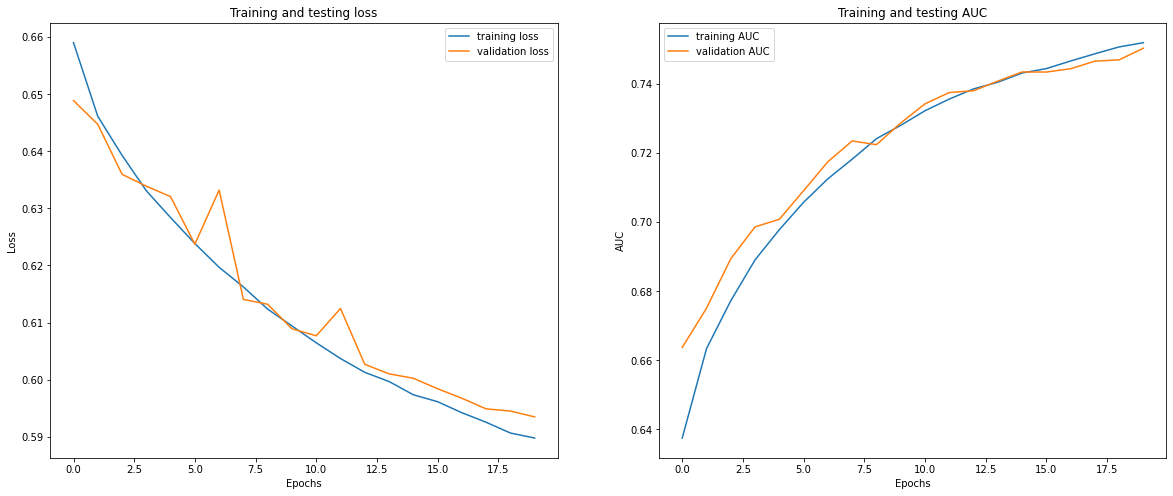

In [71]:
# We are using the history object, which is the output of fit() method.
# If the code below screams that you do not have "history" or "auc" in history,
# you might want to check my comment.
plt.figure(figsize=(20, 8), facecolor="white")
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Training and testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history.history["auc"], label="training AUC")
plt.plot(history.history["val_auc"], label="validation AUC")
plt.legend()
plt.title("Training and testing AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")

So far I have only managed to get AUC of around 0.76-0.78, but I only have a few hours to work on this. Let's see if your model gets better AUC. Good luck!